# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="./Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [7]:
from rllib.agents import DQNAgent
from rllib.models import QSequentialMLPModel

seed = 117  
agent = DQNAgent(state_size, 
                 action_size, 
                 model_class_dict= {"model_class":QSequentialMLPModel, 
                                    'hidden_layers':[64, 32, 8]}
                 , rnd=seed)        
        
            
                

Using: cpu


In [8]:
def train(n_episodes=1000, ep_max_time=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    eps = eps_start                    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(ep_max_time):
            #print(t)
            action = int(agent.predict(state, eps))
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, next_state, reward, done)
            state = next_state
            score += reward
            if done:
                break 
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        if i_episode % 1 == 0:
            print('Episode:', i_episode, ' Score:', np.mean(scores[-100:]))
        if np.mean(scores[-100:])>= 13.0:
            print('Solved!!! Episodes:', i_episode, ' Score:', np.mean(scores[-100:]))
            agent.save()
            break
    return scores

In [9]:

scores = train()

Episode: 1  Score: 1.0
Episode: 2  Score: 1.0
Episode: 3  Score: 0.6666666666666666
Episode: 4  Score: 0.5
Episode: 5  Score: 0.2
Episode: 6  Score: 0.3333333333333333
Episode: 7  Score: 0.2857142857142857
Episode: 8  Score: 0.25
Episode: 9  Score: 0.4444444444444444
Episode: 10  Score: 0.4
Episode: 11  Score: 0.2727272727272727
Episode: 12  Score: 0.25
Episode: 13  Score: 0.15384615384615385
Episode: 14  Score: 0.07142857142857142
Episode: 15  Score: 0.06666666666666667
Episode: 16  Score: 0.0625
Episode: 17  Score: 0.058823529411764705
Episode: 18  Score: 0.0
Episode: 19  Score: 0.0
Episode: 20  Score: 0.1
Episode: 21  Score: 0.19047619047619047
Episode: 22  Score: 0.09090909090909091
Episode: 23  Score: 0.13043478260869565
Episode: 24  Score: 0.125
Episode: 25  Score: 0.24
Episode: 26  Score: 0.19230769230769232
Episode: 27  Score: 0.18518518518518517
Episode: 28  Score: 0.10714285714285714
Episode: 29  Score: 0.10344827586206896
Episode: 30  Score: 0.13333333333333333
Episode: 31  

Episode: 279  Score: 7.55
Episode: 280  Score: 7.61
Episode: 281  Score: 7.65
Episode: 282  Score: 7.67
Episode: 283  Score: 7.65
Episode: 284  Score: 7.62
Episode: 285  Score: 7.67
Episode: 286  Score: 7.66
Episode: 287  Score: 7.6
Episode: 288  Score: 7.64
Episode: 289  Score: 7.63
Episode: 290  Score: 7.54
Episode: 291  Score: 7.58
Episode: 292  Score: 7.64
Episode: 293  Score: 7.63
Episode: 294  Score: 7.7
Episode: 295  Score: 7.72
Episode: 296  Score: 7.78
Episode: 297  Score: 7.78
Episode: 298  Score: 7.81
Episode: 299  Score: 7.86
Episode: 300  Score: 7.88
Episode: 301  Score: 7.89
Episode: 302  Score: 7.96
Episode: 303  Score: 8.03
Episode: 304  Score: 8.15
Episode: 305  Score: 8.23
Episode: 306  Score: 8.25
Episode: 307  Score: 8.23
Episode: 308  Score: 8.22
Episode: 309  Score: 8.3
Episode: 310  Score: 8.4
Episode: 311  Score: 8.48
Episode: 312  Score: 8.53
Episode: 313  Score: 8.61
Episode: 314  Score: 8.58
Episode: 315  Score: 8.52
Episode: 316  Score: 8.57
Episode: 317  Sc

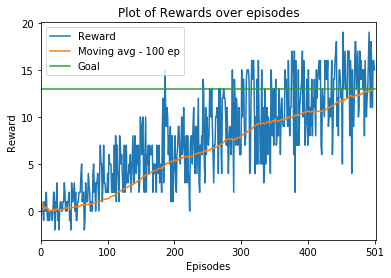

In [10]:
cum_score = []
for i in range(1,min(len(scores), 100)):
    cum_score.append(np.mean(scores[:i]))
    
for i in range(100, len(scores)):
    cum_score.append(np.mean(scores[i-100:i]))
                     
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scores)
plt.plot(cum_score)
plt.plot(np.linspace(0, len(scores), len(scores)+1), np.ones(len(scores)+1) * 13)

plt.xlim(0, len(scores)+1)
plt.xticks([0,100,200,300,400,len(scores)])
plt.title('Plot of Rewards over episodes')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend(["Reward", "Moving avg - 100 ep", "Goal"])
plt.show()

In [11]:
agent.load()
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
agent.load()
while True:
    action = agent.predict(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 15.0
